# WARNING 
Due to the possibility that the the movie ratings could change(since we they are based on community voter averages), which would in turn change the top 3 movies we are looking at in our analysis, we have saved the csvs and attached them in our project submission. Please save these in a different area/as a different name or look at these csvs before running this script to avoid corrupting the data we pulled.

# We begin by importing the relevant python libraries

In [2]:
import requests
import pandas as pd

# We now call the API
* We run the API initially to see that it is running and we notice that running in this way only pulls page 1 of data

In [3]:
response = requests.get("https://api.themoviedb.org/3/discover/movie?api_key=3424e9be9985594f9e6a4d71005f6d09&language=en-US&sort_by=popularity.desc")
                        
data = response.json()
print(response.status_code)
data

200


{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/VlHt27nCqOuTnuX6bku8QZapzO.jpg',
   'genre_ids': [28, 12, 878, 14, 35, 18],
   'id': 634649,
   'original_language': 'en',
   'original_title': 'Spider-Man: No Way Home',
   'overview': 'Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.',
   'popularity': 11147.352,
   'poster_path': '/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg',
   'release_date': '2021-12-15',
   'title': 'Spider-Man: No Way Home',
   'video': False,
   'vote_average': 8.8,
   'vote_count': 836},
  {'adult': False,
   'backdrop_path': '/eENEf62tMXbhyVvdcXlnQz2wcuT.jpg',
   'genre_ids': [878, 28, 12],
   'id': 580489,
   'original_language': 'en',
   'original_title': 'Venom: Let There Be Carnage',
   'overview': 'After finding a host body in investigative repo

# We run again but this time we change the API to what we require from our data model 
* We define the api key as a variable so this can be easily changed from user to user 
* We run a loop through each page of the data and each time add this data to all_families_movies to get all 15 pages of movie results
* We use results=req['results'] to remove the page number from our saved data since this is not relevant information about the movies
* We also just search the family genre (this is associated to genre number 10751 in the url)

In [4]:
all_family_movies = []
api_key='3424e9be9985594f9e6a4d71005f6d09'
n = 0
while n<15 : 
  n += 1
  url =  'https://api.themoviedb.org/3/discover/movie?api_key='+api_key+'&sort_by=popularity.desc&page='+str(n)+'&primary_release_date.gte=2000&with_genres=10751' 
  req = requests.get(url).json()
  results=req['results']
  all_family_movies.extend(results)

In [5]:
all_family_movies

[{'adult': False,
  'backdrop_path': '/5RuR7GhOI5fElADXZb0X2sr9w5n.jpg',
  'genre_ids': [16, 35, 10751, 14],
  'id': 568124,
  'original_language': 'en',
  'original_title': 'Encanto',
  'overview': "The tale of an extraordinary family, the Madrigals, who live hidden in the mountains of Colombia, in a magical house, in a vibrant town, in a wondrous, charmed place called an Encanto. The magic of the Encanto has blessed every child in the family with a unique gift from super strength to the power to heal—every child except one, Mirabel. But when she discovers that the magic surrounding the Encanto is in danger, Mirabel decides that she, the only ordinary Madrigal, might just be her exceptional family's last hope.",
  'popularity': 2595.206,
  'poster_path': '/4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg',
  'release_date': '2021-11-24',
  'title': 'Encanto',
  'video': False,
  'vote_average': 7.3,
  'vote_count': 344},
 {'adult': False,
  'backdrop_path': '/1Wlwnhn5sXUIwlxpJgWszT622PS.jpg',
  'genre

# Call the length to see how many movies we have

In [6]:
len(all_family_movies)

300

# Convert the data to a dataframe
* note that we don't need to import pandas since we did at the start of the notebook but if we hadn't it would be necessary here.

In [7]:
df = pd.DataFrame(all_family_movies)

In [8]:
df

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/5RuR7GhOI5fElADXZb0X2sr9w5n.jpg,"[16, 35, 10751, 14]",568124,en,Encanto,"The tale of an extraordinary family, the Madri...",2595.206,/4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg,2021-11-24,Encanto,False,7.3,344
1,False,/1Wlwnhn5sXUIwlxpJgWszT622PS.jpg,"[16, 35, 10751]",585245,en,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,2364.029,/ygPTrycbMSFDc5zUpy4K5ZZtQSC.jpg,2021-11-10,Clifford the Big Red Dog,False,7.5,597
2,False,/t27k4502Gzvln1At8iA0DMOd0mt.jpg,"[16, 878, 10751, 35]",482321,en,Ron's Gone Wrong,"In a world where walking, talking, digitally c...",1774.197,/gA9QxSravC2EVEkEKgyEmDrfL0e.jpg,2021-10-15,Ron's Gone Wrong,False,8.4,385
3,False,/5RMqFZdefnDwY7rdD1oJcTkWPdF.jpg,"[16, 35, 10751]",774741,en,Diary of a Wimpy Kid,Greg Heffley is a scrawny but ambitious kid wi...,1648.953,/obg6lWuNaZkoSlwrVG4VVk4SmT.jpg,2021-12-03,Diary of a Wimpy Kid,False,7.0,78
4,False,/13MNZaAKNoSZpOs5HULVNQwZYjB.jpg,"[10751, 12, 14, 35]",882093,pl,Dawid i Elfy,"Christmas is drawing near, but it’s not a happ...",753.845,/AtpnwDfKBlcPokEGcaxWO2fmiNl.jpg,2021-12-06,David and the Elves,False,6.7,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,/44ztHl1Cd7zQByU3zAhb8J2z2tN.jpg,"[10751, 14, 10770, 10402, 12, 28, 10749]",417320,en,Descendants 2,When the pressure to be royal becomes too much...,45.063,/8BNyZlBk4Hs92z6UrvFDjvx3yMb.jpg,2017-07-21,Descendants 2,False,7.5,1300
296,False,/lwSOhnpwrzjtKi2RD3e5RAcGzvt.jpg,"[16, 28, 12, 35, 10751]",431693,en,Spies in Disguise,Super spy Lance Sterling and scientist Walter ...,45.495,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,2019-12-04,Spies in Disguise,False,7.7,2117
297,False,/tB2w4m0rW62MTufTjRj0gFLMVBP.jpg,"[10751, 12, 18, 14]",278927,en,The Jungle Book,A man-cub named Mowgli fostered by wolves. Aft...,39.109,/tOEOlmLP71IojeJ91dyJ9Nsb8O8.jpg,2016-04-07,The Jungle Book,False,6.9,6889
298,False,/9K4QqQZg4TVXcxBGDiVY4Aey3Rn.jpg,"[16, 10751, 12, 35, 14]",460793,en,Olaf's Frozen Adventure,Olaf is on a mission to harness the best holid...,37.672,/As8WTtxXs9e3cBit3ztTf7zoRmm.jpg,2017-10-27,Olaf's Frozen Adventure,False,6.4,1233


In [9]:
df.shape

(300, 14)

In [10]:
df.describe()

,id,popularity,vote_average,vote_count
count,300.000000,300.000000,300.000000,300.000000
mean,326905.810000,148.136437,6.853333,3055.576667
std,299480.407259,268.122084,1.112421,3899.239569
min,12.000000,36.475000,0.000000,0.000000
25%,16304.250000,53.339250,6.500000,252.750000
50%,284589.000000,71.425000,7.000000,1243.500000
75%,588085.500000,122.372250,7.500000,4664.250000
max,896221.000000,2595.206000,8.600000,17236.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              300 non-null    bool   
 1   backdrop_path      298 non-null    object 
 2   genre_ids          300 non-null    object 
 3   id                 300 non-null    int64  
 4   original_language  300 non-null    object 
 5   original_title     300 non-null    object 
 6   overview           300 non-null    object 
 7   popularity         300 non-null    float64
 8   poster_path        300 non-null    object 
 9   release_date       300 non-null    object 
 10  title              300 non-null    object 
 11  video              300 non-null    bool   
 12  vote_average       300 non-null    float64
 13  vote_count         300 non-null    int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 28.8+ KB


In [12]:
df.corr()

,adult,id,popularity,video,vote_average,vote_count
adult,NaN,NaN,NaN,NaN,NaN,NaN
id,NaN,1.000000,0.296895,NaN,0.029845,-0.492674
popularity,NaN,0.296895,1.000000,NaN,0.103808,-0.118105
video,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,NaN,0.029845,0.103808,NaN,1.000000,0.225076
vote_count,NaN,-0.492674,-0.118105,NaN,0.225076,1.000000


In [13]:
df.to_csv('raw_family_movies_data')
raw_family_movies_data_read = pd.read_csv('raw_family_movies_data',index_col=[0])
raw_family_movies_data_read.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/5RuR7GhOI5fElADXZb0X2sr9w5n.jpg,"[16, 35, 10751, 14]",568124,en,Encanto,"The tale of an extraordinary family, the Madri...",2595.206,/4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg,2021-11-24,Encanto,False,7.3,344
1,False,/1Wlwnhn5sXUIwlxpJgWszT622PS.jpg,"[16, 35, 10751]",585245,en,Clifford the Big Red Dog,As Emily struggles to fit in at home and at sc...,2364.029,/ygPTrycbMSFDc5zUpy4K5ZZtQSC.jpg,2021-11-10,Clifford the Big Red Dog,False,7.5,597
2,False,/t27k4502Gzvln1At8iA0DMOd0mt.jpg,"[16, 878, 10751, 35]",482321,en,Ron's Gone Wrong,"In a world where walking, talking, digitally c...",1774.197,/gA9QxSravC2EVEkEKgyEmDrfL0e.jpg,2021-10-15,Ron's Gone Wrong,False,8.4,385
3,False,/5RMqFZdefnDwY7rdD1oJcTkWPdF.jpg,"[16, 35, 10751]",774741,en,Diary of a Wimpy Kid,Greg Heffley is a scrawny but ambitious kid wi...,1648.953,/obg6lWuNaZkoSlwrVG4VVk4SmT.jpg,2021-12-03,Diary of a Wimpy Kid,False,7.0,78
4,False,/13MNZaAKNoSZpOs5HULVNQwZYjB.jpg,"[10751, 12, 14, 35]",882093,pl,Dawid i Elfy,"Christmas is drawing near, but it’s not a happ...",753.845,/AtpnwDfKBlcPokEGcaxWO2fmiNl.jpg,2021-12-06,David and the Elves,False,6.7,32


# We now call the columns from the dataframe that we are interested in and rename the dataframe with a relevent name

In [14]:
family_movies_file = df[['title', 'release_date', 'vote_average']]

In [15]:
family_movies_file

,title,release_date,vote_average
0,Encanto,2021-11-24,7.3
1,Clifford the Big Red Dog,2021-11-10,7.5
2,Ron's Gone Wrong,2021-10-15,8.4
3,Diary of a Wimpy Kid,2021-12-03,7.0
4,David and the Elves,2021-12-06,6.7
...,...,...,...
295,Descendants 2,2017-07-21,7.5
296,Spies in Disguise,2019-12-04,7.7
297,The Jungle Book,2016-04-07,6.9
298,Olaf's Frozen Adventure,2017-10-27,6.4


# Rename one of the columns with a clearer name

In [16]:
family_movies_file.rename(columns = {"vote_average": "rating"}, inplace = True)

c:\users\user\pycharmprojects\cfg-project\venv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
family_movies_file

,title,release_date,rating
0,Encanto,2021-11-24,7.3
1,Clifford the Big Red Dog,2021-11-10,7.5
2,Ron's Gone Wrong,2021-10-15,8.4
3,Diary of a Wimpy Kid,2021-12-03,7.0
4,David and the Elves,2021-12-06,6.7
...,...,...,...
295,Descendants 2,2017-07-21,7.5
296,Spies in Disguise,2019-12-04,7.7
297,The Jungle Book,2016-04-07,6.9
298,Olaf's Frozen Adventure,2017-10-27,6.4


# Convert to csv to save this data

In [18]:
family_movies_file.to_csv('family_movies_data.csv')

# Read top 5 lines
* We note that we will continue using the dataframe family_movies_file to work with the data but we save here to create a save point that we can return, so if we want to roll back any unwanted changes we could start using the csv we have saved here, this avoids having to pull the data again 

In [19]:
family_movies_data = pd.read_csv('family_movies_data.csv',index_col=[0])
family_movies_data.head()

,title,release_date,rating
0,Encanto,2021-11-24,7.3
1,Clifford the Big Red Dog,2021-11-10,7.5
2,Ron's Gone Wrong,2021-10-15,8.4
3,Diary of a Wimpy Kid,2021-12-03,7.0
4,David and the Elves,2021-12-06,6.7


# View last 5 lines to check for missing data

In [20]:
family_movies_data.tail()

,title,release_date,rating
295,Descendants 2,2017-07-21,7.5
296,Spies in Disguise,2019-12-04,7.7
297,The Jungle Book,2016-04-07,6.9
298,Olaf's Frozen Adventure,2017-10-27,6.4
299,Doraemon: Nobita's Great Adventure in the Anta...,2017-03-04,7.5


In [21]:
pip install seaborn

# Import more libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a heatmap to look for missing values. We see there are no missing values.
* We note that are also able to see this with the .info() function we used earlier that told us all of the 300 peices of data have no null values

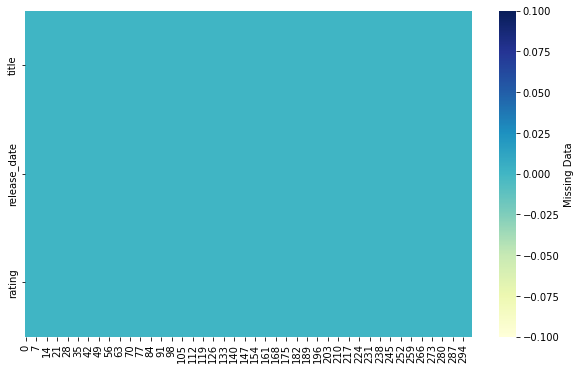

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(family_movies_file.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("missing_movies_file.png", dpi=100)

# Identify data types

In [24]:
family_movies_file.dtypes

title            object
release_date     object
rating          float64
dtype: object

# Convert release date to string


In [25]:
family_movies_file['release_date'].astype(str)

0      2021-11-24
1      2021-11-10
2      2021-10-15
3      2021-12-03
4      2021-12-06
          ...    
295    2017-07-21
296    2019-12-04
297    2016-04-07
298    2017-10-27
299    2017-03-04
Name: release_date, Length: 300, dtype: object

# Change the release date to year form by slicing the string

In [26]:
family_movies_file['release_date'].str[0:4]

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
295    2017
296    2019
297    2016
298    2017
299    2017
Name: release_date, Length: 300, dtype: object

# Add a new column for release year

In [27]:
family_movies_file['release_year'] = family_movies_file['release_date'].str[0:4]

C:\Users\User\AppData\Local\Temp/ipykernel_29188/3780161625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_movies_file['release_year'] = family_movies_file['release_date'].str[0:4]


In [28]:
family_movies_file

,title,release_date,rating,release_year
0,Encanto,2021-11-24,7.3,2021
1,Clifford the Big Red Dog,2021-11-10,7.5,2021
2,Ron's Gone Wrong,2021-10-15,8.4,2021
3,Diary of a Wimpy Kid,2021-12-03,7.0,2021
4,David and the Elves,2021-12-06,6.7,2021
...,...,...,...,...
295,Descendants 2,2017-07-21,7.5,2017
296,Spies in Disguise,2019-12-04,7.7,2019
297,The Jungle Book,2016-04-07,6.9,2016
298,Olaf's Frozen Adventure,2017-10-27,6.4,2017


# Remove the release date column

In [29]:
family_movies_file = family_movies_file.drop('release_date', 1)

C:\Users\User\AppData\Local\Temp/ipykernel_29188/1201539661.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  family_movies_file = family_movies_file.drop('release_date', 1)


# View the updated dataframe

In [30]:
family_movies_file

,title,rating,release_year
0,Encanto,7.3,2021
1,Clifford the Big Red Dog,7.5,2021
2,Ron's Gone Wrong,8.4,2021
3,Diary of a Wimpy Kid,7.0,2021
4,David and the Elves,6.7,2021
...,...,...,...
295,Descendants 2,7.5,2017
296,Spies in Disguise,7.7,2019
297,The Jungle Book,6.9,2016
298,Olaf's Frozen Adventure,6.4,2017


# Plot to see a quick visual of the spread of years

<AxesSubplot:>

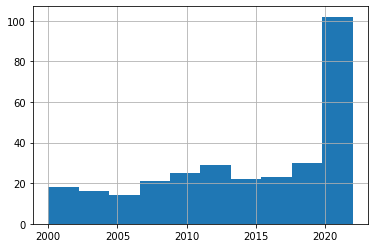

In [31]:
family_movies_file['release_year'] = pd.to_numeric(family_movies_file['release_year'])

family_movies_file['release_year'].hist()

# We call the min and max functions to see more accurately our range of release years

In [32]:
family_movies_file['release_year'].min()

2000

In [33]:
family_movies_file['release_year'].max()

2022

# Save this data 
* We again save the data so that if we make changes to the data frame family_moves_file that we are not happy with we can pull the family_movies_data_clean data that we saved at this point rather than having to pull the data from the api and go through all of the steps again


In [34]:
family_movies_file.to_csv('family_movies_data_clean.csv')

In [35]:
family_movies_data_clean = pd.read_csv('family_movies_data_clean.csv',index_col=[0])
family_movies_data_clean.head()

,title,rating,release_year
0,Encanto,7.3,2021
1,Clifford the Big Red Dog,7.5,2021
2,Ron's Gone Wrong,8.4,2021
3,Diary of a Wimpy Kid,7.0,2021
4,David and the Elves,6.7,2021


# Looking for movies between 2000 - 2020

In [57]:
data2000to2020 = family_movies_file[family_movies_file['release_year'] <= 2020]

In [58]:
data2000to2020.to_csv('family_movies_data2000to2020.csv')

In [59]:
family_movies_2000_to_2020 = pd.read_csv('family_movies_data2000to2020.csv',index_col=[0])
family_movies_2000_to_2020.head()

,title,rating,release_year
20,Sonic the Hedgehog,7.4,2020
22,The Croods: A New Age,7.6,2020
23,"Miraculous World: New York, United HeroeZ",8.3,2020
26,Sing,7.1,2016
27,How the Grinch Stole Christmas,6.7,2000


# Top 3 Family films in the years 2009, 2011, 2013,2015,2017 (respectively) sorted by rating
* We search the family_movies_2000_to_2020 data to speed up the sort since this is a smaller dataset than the one including 2000-2022
* We also save this separated data as new csv files

In [42]:
family_movies_2009 = family_movies_2000_to_2020[family_movies_2000_to_2020['release_year'] == 2009]
family_movies_2009_top3 = family_movies_2009.sort_values(by=['rating'], axis=0, ascending=False, inplace=False).head(3)
family_movies_2009_top3

,title,rating,release_year
117,Up,7.9,2009
91,Coraline,7.8,2009
161,The Princess and the Frog,7.1,2009


In [44]:
family_movies_2009_top3.to_csv('family_movies_2009_top3.csv')
family_movies_2009_top3_read = pd.read_csv('family_movies_2009_top3.csv',index_col=[0])
family_movies_2009_top3_read

,title,rating,release_year
117,Up,7.9,2009
91,Coraline,7.8,2009
161,The Princess and the Frog,7.1,2009


In [45]:
family_movies_2011 = family_movies_2000_to_2020[family_movies_2000_to_2020['release_year'] == 2011]
family_movies_2011_top3 = family_movies_2011.sort_values(by=['rating'], axis=0, ascending=False, inplace=False).head(3)
family_movies_2011_top3

,title,rating,release_year
216,La leyenda de la Llorona,7.7,2011
160,Barbie: Princess Charm School,7.4,2011
188,Soul Surfer,7.1,2011


In [46]:
family_movies_2011_top3.to_csv('family_movies_2011_top3.csv')
family_movies_2011_top3_read = pd.read_csv('family_movies_2011_top3.csv',index_col=[0])
family_movies_2011_top3_read

,title,rating,release_year
216,La leyenda de la Llorona,7.7,2011
160,Barbie: Princess Charm School,7.4,2011
188,Soul Surfer,7.1,2011


In [47]:
family_movies_2013 = family_movies_2000_to_2020[family_movies_2000_to_2020['release_year'] == 2013]
family_movies_2013_top3 = family_movies_2013.sort_values(by=['rating'], axis=0, ascending=False, inplace=False).head(3)
family_movies_2013_top3

,title,rating,release_year
77,Frozen,7.3,2013
125,Monsters University,7.0,2013
109,The Croods,6.9,2013


In [48]:
family_movies_2013_top3.to_csv('family_movies_2013_top3.csv')
family_movies_2013_top3_read = pd.read_csv('family_movies_2013_top3.csv',index_col=[0])
family_movies_2013_top3_read

,title,rating,release_year
77,Frozen,7.3,2013
125,Monsters University,7.0,2013
109,The Croods,6.9,2013


In [49]:
family_movies_2015 = family_movies_2000_to_2020[family_movies_2000_to_2020['release_year'] == 2015]
family_movies_2015_top3 = family_movies_2015.sort_values(by=['rating'], axis=0, ascending=False, inplace=False).head(3)
family_movies_2015_top3

,title,rating,release_year
130,Inside Out,7.9,2015
214,Descendants,7.1,2015
204,Frozen Fever,6.9,2015


In [51]:
family_movies_2015_top3.to_csv('family_movies_2015_top3.csv')
family_movies_2015_top3_read = pd.read_csv('family_movies_2015_top3.csv',index_col=[0])
family_movies_2015_top3_read

,title,rating,release_year
130,Inside Out,7.9,2015
214,Descendants,7.1,2015
204,Frozen Fever,6.9,2015


In [52]:
family_movies_2017 = family_movies_2000_to_2020[family_movies_2000_to_2020['release_year'] == 2017]
family_movies_2017_top3 = family_movies_2017.sort_values(by=['rating'], axis=0, ascending=False, inplace=False).head(3)
family_movies_2017_top3

,title,rating,release_year
41,Coco,8.2,2017
239,Gifted,8.1,2017
246,A Dog's Purpose,7.6,2017


In [53]:
family_movies_2017_top3.to_csv('family_movies_2017_top3.csv')
family_movies_2017_top3_read = pd.read_csv('family_movies_2017_top3.csv',index_col=[0])
family_movies_2017_top3_read

,title,rating,release_year
41,Coco,8.2,2017
239,Gifted,8.1,2017
246,A Dog's Purpose,7.6,2017
